In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
import pandas as pd

df = pd.read_csv('BL-Flickr-Images-Book.csv')
df.head()


,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.\t\t\t\t\t\t\...
1,216,NaN,London\t Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.\t\t\t\t\t\t\...
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of â€œAll for ...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.\t\t\t\t\t\t\...
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.\t\t\t\t\t\...
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.\t\t\t\t\t\t\t...


In [71]:
Title= np.arange(10).reshape(-1, 1)
Contributors= np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [72]:
Title
Contributors

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [73]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [74]:
model.fit(Title,Contributors) 

LogisticRegression(random_state=0, solver='liblinear')

In [75]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(Title, Contributors)

In [52]:
>>> model.classes_

array([0, 1])

In [53]:
>>> model.intercept_
>>> model.coef_

array([[0.51491375]])

In [54]:
>>> model.predict_proba(Title)


array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [55]:
 model.predict(Title)


array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [76]:
model.score(Title, Contributors)


0.9

In [77]:
confusion_matrix(Contributors, model.predict(Title))


array([[3, 1],
       [0, 6]], dtype=int64)

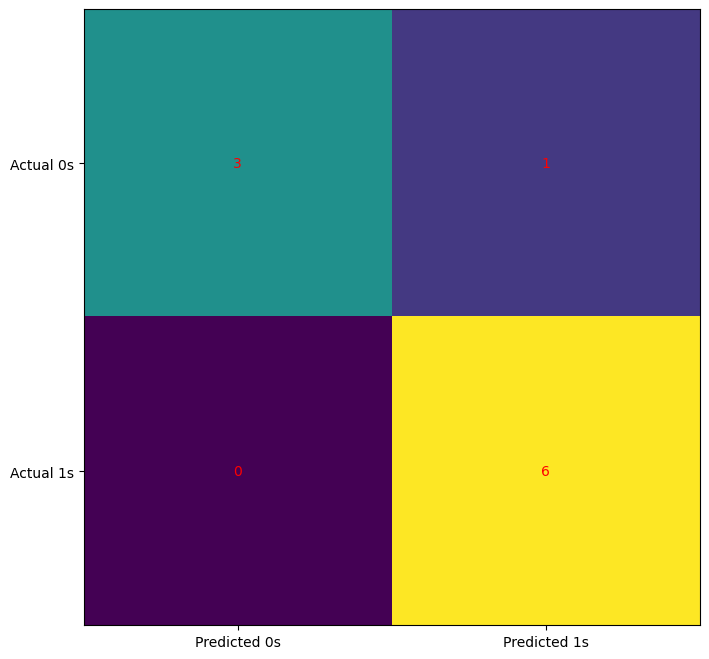

In [78]:
cm = confusion_matrix(Contributors, model.predict(Title))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [79]:
>>> print(classification_report(Contributors, model.predict(Title)))


              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [80]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(Title, Contributors)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [22]:
model.intercept_


array([-3.51335372])

In [23]:
model.coef_


array([[1.12066084]])

In [63]:
model.predict_proba(Title)


array([[0.97106534, 0.02893466],
       [0.9162684 , 0.0837316 ],
       [0.7810904 , 0.2189096 ],
       [0.53777071, 0.46222929],
       [0.27502212, 0.72497788],
       [0.11007743, 0.88992257],
       [0.03876835, 0.96123165],
       [0.01298011, 0.98701989],
       [0.0042697 , 0.9957303 ],
       [0.00139621, 0.99860379]])

In [64]:
model.predict(Title)



array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [81]:
model.score(Title, Contributors)


1.0

In [82]:
confusion_matrix(Contributors, model.predict(Title))


array([[4, 0],
       [0, 6]], dtype=int64)

In [30]:
# Step 1: Import packages, functions, and classes
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Get data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

# Step 3: Create a model and train it
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

# Step 4: Evaluate the model
p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)
print('x:', x, sep='\n')


x:
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [89]:
print('Contributors:', Contributors, sep='\n', end='\n\n')


Contributors:
[0 0 0 0 1 1 1 1 1 1]



In [32]:
print('intercept:', model.intercept_)

intercept: [-1.51632619]


In [33]:
print('coef:', model.coef_, end='\n\n')

coef: [[0.703457]]



In [35]:
import numpy as np
import statsmodels.api as sm

In [90]:
Title= np.arange(10).reshape(-1, 1)
Contributors= np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])
Title= sm.add_constant(x)

In [91]:
model = sm.Logit(Contributors, Title)

In [92]:
result = model.fit(method='newton')


Optimization terminated successfully.
         Current function value: 0.350471
         Iterations 7


In [93]:
>>> result.params


array([-1.972805  ,  0.82240094])

In [94]:
result.predict(Title)


array([0.12208792, 0.24041529, 0.41872657, 0.62114189, 0.78864861,
       0.89465521, 0.95080891, 0.97777369, 0.99011108, 0.99563083])

In [97]:
(result.predict(Title) >= 0.5).astype(int)


array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [96]:
result.pred_table()
    

array([[2., 1.],
       [1., 6.]])

In [95]:
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Mon, 11 Mar 2024   Pseudo R-squ.:                  0.4263
Time:                        14:35:28   Log-Likelihood:                -3.5047
converged:                       True   LL-Null:                       -6.1086
Covariance Type:            nonrobust   LLR p-value:                   0.02248
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9728      1.737     -1.136      0.256      -5.377       1.431
x1             0.8224      0.528      1.557      0.119      -0.213       1.858
==============================================================================
"""

In [10]:
import pandas as pd

# Assuming you have a DataFrame named df
# Example DataFrame creation (replace this with your actual data loading or creation)
data = {'Contributors': ['FORBES, Walter', 'BLAZE DE BURY, Marie Pauline Rose - Barones', 'BLAZE DE BURY, Marie Pauline Rose - Baroness', 'Appleyard, Ernest Silvanus.', 'BROOME, John Henry']}
df = pd.DataFrame(data)

# Now you can use value_counts on the DataFrame
counts = df['Contributors'].value_counts()
print(counts)


FORBES, Walter                                  1
BLAZE DE BURY, Marie Pauline Rose - Barones     1
BLAZE DE BURY, Marie Pauline Rose - Baroness    1
Appleyard, Ernest Silvanus.                     1
BROOME, John Henry                              1
Name: Contributors, dtype: int64


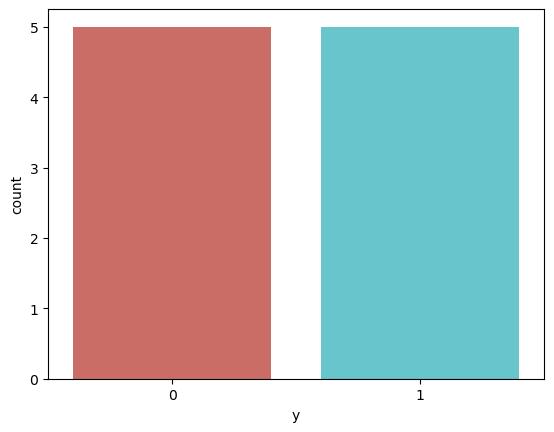

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named data
# Example DataFrame creation (replace this with your actual data loading or creation)
data = {'y': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0]}
df = pd.DataFrame(data)

# Now you can use sns.countplot
sns.countplot(x="y", data=df, palette="hls")
plt.show()

